In [1]:
# crm 2019
import os
import datetime
import logging

import core
from radaraxes import radar_factory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
logger = logging.getLogger("ipynb")
date_str = datetime.datetime.now().strftime("%Y%m%d")
dest_name = "DW" + date_str
data_dir = "../dat"
npz_dir = os.path.join(data_dir, date_str + "/")
list_path = os.path.join(data_dir, "users.txt")
sns.set(style="darkgrid")

In [3]:
# spotify username authorization or empty for client credentials
sp = core.do_auth("chadrm9")

INFO:core:User chadrm9 authorized!
INFO:core:Client credentialized!


In [5]:
# copy_playlist(sp, username, source_playlist_name, destination_playlist_name, owner)
ss_id = core.copy_playlist(sp, "chadrm9", "Discover Weekly", dest_name, "spotify")

INFO:core:Playlist Discover Weekly copied to DW20190819 for chadrm9


In [6]:
# fetch_user_list(sp, _input_username_list, output_data_dir)
user_list = core.fetch_user_list(sp, list_path, npz_dir)

INFO:core:Loaded chadrm9 from ../dat/20190820/chadrm9.npz
INFO:core:Fetching user 1296225797
INFO:core:bwb 
INFO:core:The mic
INFO:core:Fml
INFO:core:Covers?
INFO:core:Retrieved 233 tracks in 4 public playlists
INFO:User:Stored 1296225797 to ../dat/20190820/1296225797.npz
INFO:core:Fetching user x4s7phb9n8c8frmj2d7hfrrce
INFO:core:��️������⏳ViS0NS⌛��️����️��
INFO:core:����⚰️L0VE. PROTOCOL����
INFO:core:🎼🛡️⚔️🔗📜🖋️LIGHT.P0W3RED 🦊🍞🏹⚰️🎑
INFO:core:LiGHT
INFO:core:2019 U memba❤️🙏🍀🤯
INFO:core:🍯Mel🐍🗝️🐁Chae🥛
INFO:core:🐍Edit! 🕊️
INFO:core:CD II: !.. Big CAKE! 🍰😖🎂❤️
INFO:core:CD I: Tune Up Gamma's Discobus! 🎶🤯🤩
INFO:core:🍯💕🍞💪🍀
INFO:core:Emry Beau 🌾🏡🌷(.BO Knows!)
INFO:core:Ad 🐺🍀🌾🏡🦗(HomeWERK! 💚💕💪)
INFO:core:Addi🙏💕💪
INFO:core:Retrieved 467 tracks in 13 public playlists
INFO:User:Stored x4s7phb9n8c8frmj2d7hfrrce to ../dat/20190820/x4s7phb9n8c8frmj2d7hfrrce.npz
INFO:core:Fetching user dudja
INFO:core:Funky Fresh
INFO:core:Trust Issues (Dedicated to Lil Peep)
INFO:core:Egotistical B******s :5/18/19
INFO

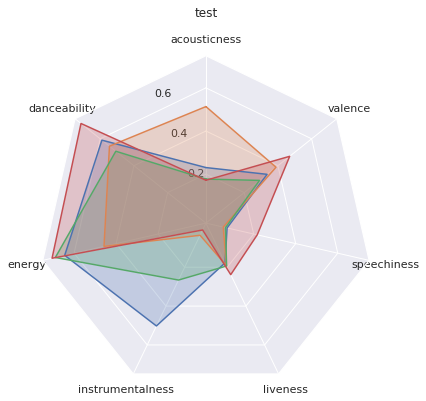

In [7]:
np_af_mean_flt = np.vstack([np.mean(user.np_af_flt, axis=0) for user in user_list])
np_af_mean_flt = np.delete(np_af_mean_flt, [5, 8], 1)
N = len(np_af_mean_flt[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'speechiness', 'valence']
title = "test"
case_data = np_af_mean_flt

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()